In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('dataHospital.csv')

In [4]:
cols = df.columns.to_list()[1:17]
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   dep_name          560486 non-null  object 
 1   esi               558029 non-null  float64
 2   age               560475 non-null  float64
 3   gender            560486 non-null  object 
 4   ethnicity         560486 non-null  object 
 5   race              560460 non-null  object 
 6   lang              560486 non-null  object 
 7   religion          425288 non-null  object 
 8   maritalstatus     560486 non-null  object 
 9   employstatus      560486 non-null  object 
 10  insurance_status  560486 non-null  object 
 11  disposition       560486 non-null  object 
 12  arrivalmode       538602 non-null  object 
 13  arrivalmonth      560486 non-null  object 
 14  arrivalday        560486 non-null  object 
 15  arrivalhour_bin   560486 non-null  object 
dtypes: float64(2), objec

In [5]:
df[cols].head()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin
0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,NaN,Single,Full Time,Other,Discharge,Walk-in,June,Tuesday,23-02
1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Car,January,Tuesday,15-18
2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Walk-in,July,Thursday,11-14
3,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Car,July,Saturday,11-14
4,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,Admit,Walk-in,November,Tuesday,07-10


<Axes: ylabel='Frequency'>

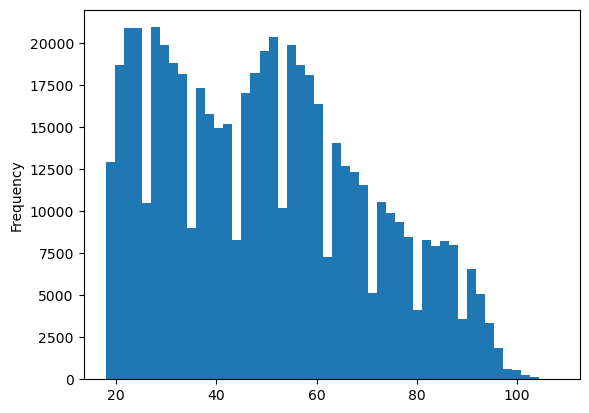

In [6]:
df.age.plot.hist(bins=50)

In [7]:
df[cols][df['age'].isnull()]

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin
284824,B,2.0,NaN,Male,Unknown,Unknown,Other,Unknown,Unknown,Unknown,Other,Discharge,NaN,June,Sunday,15-18
430953,A,2.0,NaN,Male,Unknown,Unknown,English,Unknown,Unknown,Unknown,Other,Discharge,ambulance,June,Saturday,03-06
449568,A,2.0,NaN,Male,Unknown,Unknown,Other,Unknown,Unknown,Unknown,Other,Discharge,ambulance,March,Friday,15-18
452566,A,1.0,NaN,Male,Unknown,Unknown,English,Unknown,Unknown,Unknown,Other,Discharge,ambulance,May,Monday,15-18
453968,A,2.0,NaN,Male,Unknown,Unknown,Other,Unknown,Unknown,Unknown,Other,Discharge,ambulance,June,Thursday,23-02
458868,A,2.0,NaN,Male,Unknown,Unknown,Other,Unknown,Unknown,Unknown,Other,Discharge,Car,August,Monday,15-18
469080,A,2.0,NaN,Male,Hispanic or Latino,Other,Other,NaN,Single,Not Employed,Other,Discharge,ambulance,January,Sunday,23-02
482275,A,2.0,NaN,Male,Unknown,Unknown,English,NaN,Married,Unknown,Other,Admit,ambulance,March,Thursday,15-18
483453,A,2.0,NaN,Male,Hispanic or Latino,Other,Other,NaN,Single,Not Employed,Other,Admit,ambulance,April,Thursday,19-22
490911,B,5.0,NaN,Male,Hispanic or Latino,Other,Other,Unknown,Unknown,Unknown,Other,Discharge,ambulance,August,Wednesday,23-02


<Axes: ylabel='insurance_status'>

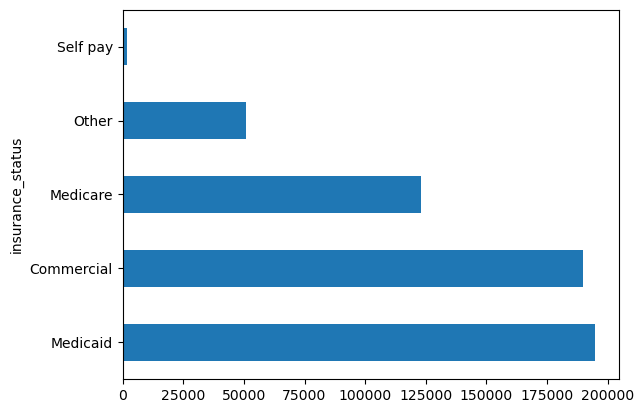

In [8]:
df.insurance_status.value_counts().plot.barh()

<Axes: ylabel='arrivalmode'>

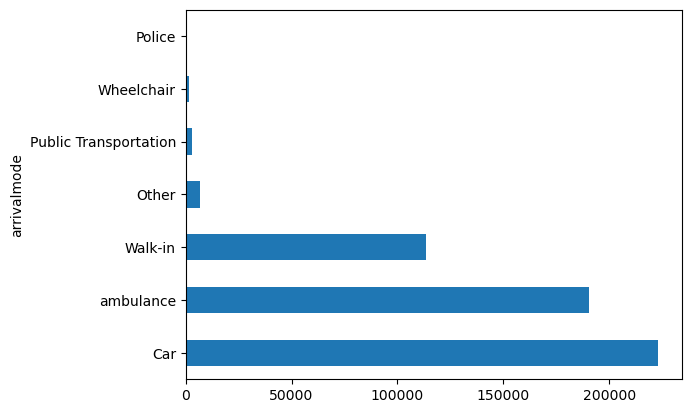

In [9]:
df.arrivalmode.value_counts().plot.barh()

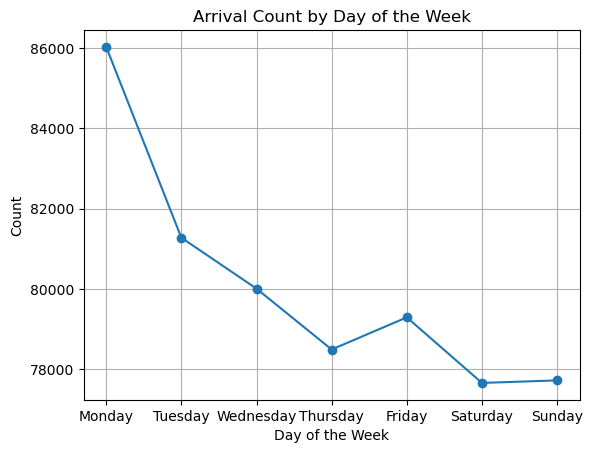

In [10]:
week = pd.DataFrame(df.arrivalday.value_counts()).reset_index()
# Map days of the week to numerical values
day_order = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
week['day_num'] = week['arrivalday'].map(day_order)
week_sorted = week.sort_values('day_num')


# Plot the data
fig, ax = plt.subplots()
ax.plot(week_sorted['arrivalday'], week_sorted['count'], marker='o')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count')
ax.set_title('Arrival Count by Day of the Week')
ax.grid(True)


array([[<Axes: title={'center': 'esi'}>, <Axes: title={'center': 'age'}>]],
      dtype=object)

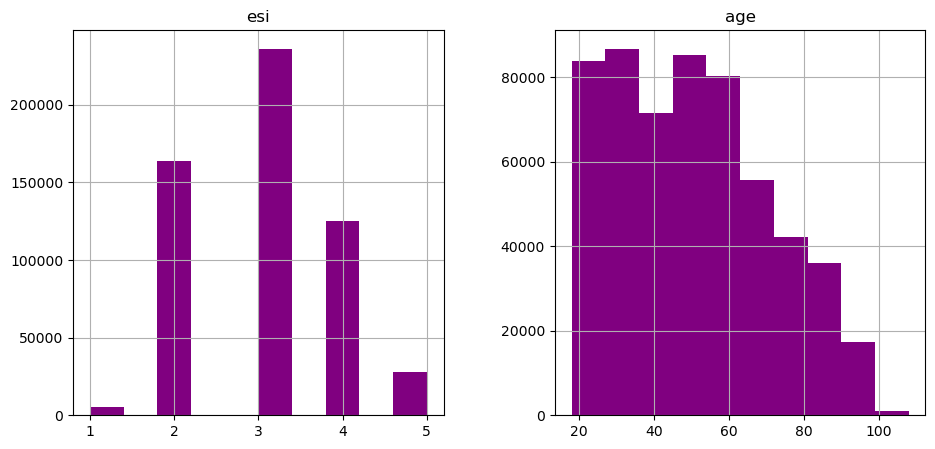

In [11]:
df[cols].hist(figsize = (11,5), color="#800080")

<Axes: >

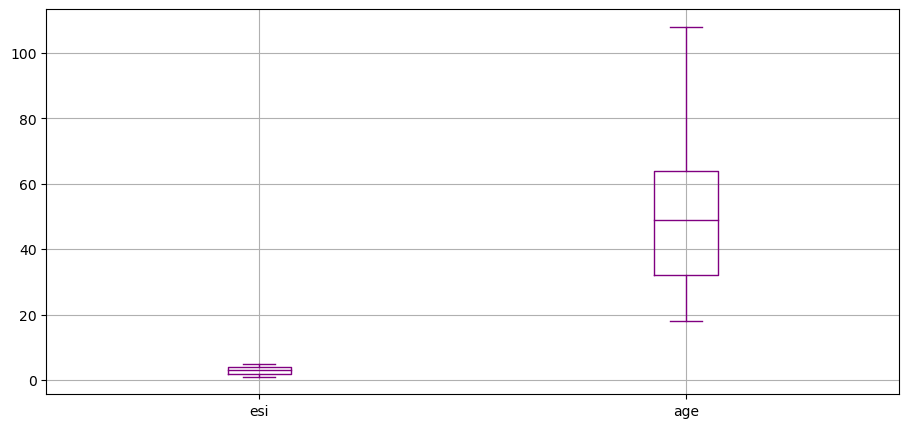

In [12]:
df[cols].boxplot(figsize = (11,5), color="#800080")

In [13]:
othercols = df.columns.to_list()[17:]
odf = df[othercols]

In [14]:
odf.describe()

,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,acutphanm,adjustmentdisorders,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
count,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,...,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000
mean,0.002155,0.030634,0.014807,0.000023,0.005179,0.009968,0.051054,0.035844,0.000459,0.001633,...,0.001298,0.000717,0.013085,0.001052,0.001165,0.004219,0.002863,0.001233,0.001393,0.002518
std,0.046375,0.172324,0.120779,0.004816,0.071782,0.099342,0.220108,0.185901,0.021408,0.040371,...,0.036001,0.026900,0.113638,0.032475,0.034113,0.064820,0.053426,0.035095,0.037293,0.050156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [23]:
# Identify disease columns (all columns except the essential ones)
essential_columns = df.columns[1:17]
disease_columns = [col for col in df.columns if col not in essential_columns]

rec_dis = [{i : df[i].sum()} for i in disease_columns[2:]]
    

In [27]:
rec_dis = [{i : df[i].sum()} for i in disease_columns[2:]]


In [29]:
sorted_rec_dis = sorted(rec_dis, key=lambda x: list(x.values())[0], reverse=True)
sorted_rec_dis

[{'platelets_max': 69690960.0},
 {'platelets_median': 62395692.5},
 {'platelets_min': 56692167.0},
 {'platelets_last': 56665355.0},
 {'sbp_max': 52518147.0},
 {'triage_vital_sbp': 52356721.635714285},
 {'sbp_median': 45293200.5},
 {'sbp_last': 43365016.0},
 {'sbp_min': 39196670.0},
 {'b-typenatriureticpeptide,pro(probnp)_max': 37869291.1},
 {'glucose_max': 37128056.0},
 {'triage_vital_temp': 37026863.55000001},
 {'sodium_max': 34320105.0},
 {'temp_max': 34273213.6},
 {'pulse_max': 34149094.0},
 {'sodium_median': 33976507.5},
 {'temp_median': 33973239.25},
 {'triage_vital_hr': 33760920.624404766},
 {'temp_min': 33705750.999999985},
 {'sodium_min': 33594644.0},
 {'b-typenatriureticpeptide,pro(probnp)_median': 32967524.150000017},
 {'spo2_max': 32261902.0},
 {'spo2_median': 31888878.5},
 {'dbp_max': 31875773.0},
 {'triage_vital_dbp': 31584574.707142863},
 {'spo2_min': 31120593.0},
 {'glucose_median': 31003322.0},
 {'b-typenatriureticpeptide,pro(probnp)_min': 29698308.60000001},
 {'sodium_

In [31]:
rec_dis

[{'2ndarymalig': 1208.0},
 {'abdomhernia': 17170.0},
 {'abdomnlpain': 8299.0},
 {'abortcompl': 13.0},
 {'acqfootdef': 2903.0},
 {'acrenlfail': 5587.0},
 {'acutecvd': 28615.0},
 {'acutemi': 20090.0},
 {'acutphanm': 257.0},
 {'adjustmentdisorders': 915.0},
 {'adltrespfl': 3992.0},
 {'alcoholrelateddisorders': 31336.0},
 {'allergy': 25704.0},
 {'amniosdx': 86.0},
 {'analrectal': 2603.0},
 {'anemia': 47494.0},
 {'aneurysm': 6004.0},
 {'anxietydisorders': 111779.0},
 {'appendicitis': 848.0},
 {'artembolism': 654.0},
 {'asppneumon': 1343.0},
 {'asthma': 106748.0},
 {'attentiondeficitconductdisruptivebeha': 27610.0},
 {'backproblem': 53853.0},
 {'biliarydx': 10153.0},
 {'birthasphyx': 9.0},
 {'birthtrauma': 30.0},
 {'bladdercncr': 2467.0},
 {'blindness': 9296.0},
 {'bnignutneo': 6770.0},
 {'bonectcncr': 723.0},
 {'bph': 14620.0},
 {'brainnscan': 649.0},
 {'breastcancr': 10977.0},
 {'breastdx': 5701.0},
 {'brnchlngca': 4320.0},
 {'bronchitis': 707.0},
 {'burns': 622.0},
 {'cardiaarrst': 1091.0

In [19]:
disease_column

NameError: name 'disease_column' is not defined

In [48]:
vitals = [{'n_edvisits': 2051320},
 {'n_admissions': 520591},
 {'absolutelymphocytecount_last': 419836.40000000026},
 {'acetonebld_last': 9126.0},
 {'alanineaminotransferase(alt)_last': 3616144.0},
 {'albumin_last': 441558.6},
 {'alkphos_last': 11641788.0},
 {'anc(absneutrophilcount)_last': 1351607.7000000007},
 {'aniongap_last': 3113914.0},
 {'aspartateaminotransferase(ast)_last': 4374123.0},
 {'b-typenatriureticpeptide,pro(probnp)_last': 18374809.500000004},
 {'baseexcess(poc)_last': 75857.0},
 {'baseexcess,venous(poc)_last': 20699.0},
 {'basos_last': 130911.30000000002},
 {'basosabs_last': 45254.61999999998},
 {'benzodiazepinesscreen,urine,noconf._last': -55.0},
 {'bilirubindirect_last': 12167.419999999996},
 {'bilirubintotal_last': 73576.15999999999},
 {'bun_last': 3920230.0},
 {'bun/creatratio_last': 3035586.5},
 {'calcium_last': 1989720.2},
 {'calculatedco2(poc)_last': 1258239.0},
 {'calculatedhco3(poc)i_last': 1041547.0999999997},
 {'calculatedo2saturation(poc)_last': 2598391.0},
 {'chloride_last': 21520181.0},
 {'cktotal_last': 3162452.0},
 {'co2_last': 4926866.0},
 {'co2calculated,venous(poc)_last': 429265.0},
 {'co2,poc_last': 1269505.0},
 {'creatinine_last': 244748.33},
 {'d-dimer_last': 280508.72},
 {'egfr_last': 333847.0},
 {'egfr(nonafricanamerican)_last': 1575364.0},
 {'egfr(aframer)_last': 1105492.0},
 {'eos_last': 436488.4999999999},
 {'eosinoabs_last': 7188.370000000001},
 {'epithelialcells_last': 30.0},
 {'globulin_last': 359357.99999999994},
 {'glucose_last': 27322367.0},
 {'glucose,meter_last': 6488721.0},
 {'hco3calculated,venous(poc)_last': 411455.0000000001},
 {'hematocrit_last': 8597005.9},
 {'hemoglobin_last': 2861618.3000000003},
 {'immaturegrans(abs)_last': 1496.43},
 {'immaturegranulocytes_last': 20182.599999999995},
 {'inr_last': 100094.40000000002},
 {'lactate,poc_last': 98421.41999999998},
 {'lipase_last': 3151161.0},
 {'lymphs_last': 5154032.199999997},
 {'magnesium_last': 96656.69999999998},
 {'mch_last': 6632692.300000001},
 {'mchc_last': 7448544.400000002},
 {'mcv_last': 19942728.1},
 {'monocytes_last': 1722615.7000000007},
 {'monosabs_last': 787125.1},
 {'mpv_last': 1936109.0999999999},
 {'neutrophils_last': 14551156.699999996},
 {'nrbc_last': 10450.499999999996},
 {'nrbcabsolute_last': 266.9},
 {'o2satcalculated,venous(poc)_last': 917456.0},
 {'pco2(poc)_last': 1790262.0},
 {'pco2,venous(poc)_last': 672835.0},
 {'ph,venous(poc)_last': 116447.32999999999},
 {'phencyclidine(pcp)screen,urine,noconf._last': 0.0},
 {'phosphorus_last': 134747.2},
 {'platelets_last': 56665355.0},
 {'po2(poc)_last': 1592957.0},
 {'po2,venous(poc)_last': 552328.0},
 {'pocbun_last': 1217742.0},
 {'poccreatinine_last': 83013.45999999999},
 {'pocglucose_last': 11573328.815999998},
 {'pochematocrit_last': 2329691.0},
 {'pocionizedcalcium_last': 263760.76999999996},
 {'pocph_last': 326843.99500000005},
 {'pocpotassium_last': 233539.3},
 {'pocsodium_last': 7980390.0},
 {'poctroponini._last': 4422.49},
 {'potassium_last': 854591.6},
 {'proteintotal_last': 788235.6000000001},
 {'prothrombintime_last': 1074240.0},
 {'ptt_last': 1322286.6999999997},
 {'rbc_last': 977030.6699999998},
 {'rbc/hpf_last': 2149108.0},
 {'rdw_last': 3069400.1999999997},
 {'sodium_last': 29580090.0},
 {'troponini(poc)_last': 3516.040000000002},
 {'troponint_last': 621.4900000000001},
 {'tsh_last': 68861.83200000001},
 {'wbc_last': 2014644.6500000001},
 {'wbc/hpf_last': 1788048.0},
 {'absolutelymphocytecount_min': 401899.29999999993},
 {'acetonebld_min': 40055.0},
 {'alanineaminotransferase(alt)_min': 4322298.0},
 {'albumin_min': 669236.7},
 {'alkphos_min': 15341599.0},
 {'anc(absneutrophilcount)_min': 1230804.3},
 {'aniongap_min': 3244937.0},
 {'aspartateaminotransferase(ast)_min': 5450913.0},
 {'b-typenatriureticpeptide,pro(probnp)_min': 29698308.60000001},
 {'baseexcess(poc)_min': 26758.0},
 {'baseexcess,venous(poc)_min': 678.0},
 {'basos_min': 93077.99999999999},
 {'basosabs_min': 55577.72000000002},
 {'benzodiazepinesscreen,urine,noconf._min': -5365.0},
 {'bilirubindirect_min': 17964.26},
 {'bilirubintotal_min': 81659.12000000002},
 {'bun_min': 3693131.0},
 {'bun/creatratio_min': 3335685.399999998},
 {'calcium_min': 2212933.4},
 {'calculatedco2(poc)_min': 2632652.0},
 {'calculatedhco3(poc)i_min': 2143599.0},
 {'calculatedo2saturation(poc)_min': 5325734.0},
 {'chloride_min': 24299268.0},
 {'cktotal_min': 8233339.0},
 {'co2_min': 5303694.7},
 {'co2calculated,venous(poc)_min': 654372.0},
 {'co2,poc_min': 2514501.0},
 {'creatinine_min': 242700.8299999999},
 {'d-dimer_min': 859141.0699999998},
 {'egfr_min': 668735.0},
 {'egfr(nonafricanamerican)_min': 2271301.0},
 {'egfr(aframer)_min': 1620434.0},
 {'eos_min': 330167.19999999995},
 {'eosinoabs_min': 6059.169999999999},
 {'epithelialcells_min': 130.0},
 {'globulin_min': 539033.1999999998},
 {'glucose_min': 26940476.0},
 {'glucose,meter_min': 10246831.0},
 {'hco3calculated,venous(poc)_min': 624606.2999999998},
 {'hematocrit_min': 9239031.899999999},
 {'hemoglobin_min': 3085773.3000000003},
 {'immaturegrans(abs)_min': 1112.2300000000002},
 {'immaturegranulocytes_min': 18126.3},
 {'inr_min': 149327.08999999997},
 {'lactate,poc_min': 157613.89999999997},
 {'lipase_min': 4515239.0},
 {'lymphs_min': 4816062.199999999},
 {'magnesium_min': 203930.60000000006},
 {'mch_min': 7285857.8},
 {'mchc_min': 8201015.699999997},
 {'mcv_min': 21954066.1},
 {'monocytes_min': 1633008.5999999999},
 {'monosabs_min': 1007760.9000000003},
 {'mpv_min': 2032041.7},
 {'neutrophils_min': 14865172.8},
 {'nrbc_min': 12212.100000000006},
 {'nrbcabsolute_min': 156.50000000000003},
 {'o2satcalculated,venous(poc)_min': 1344491.0},
 {'pco2(poc)_min': 3711669.0},
 {'pco2,venous(poc)_min': 1013471.0},
 {'ph,venous(poc)_min': 184692.59000000003},
 {'phencyclidine(pcp)screen,urine,noconf._min': 0.0},
 {'phosphorus_min': 302855.7},
 {'platelets_min': 56692167.0},
 {'po2(poc)_min': 3228022.0},
 {'po2,venous(poc)_min': 814816.0},
 {'pocbun_min': 2092091.0},
 {'poccreatinine_min': 152442.86},
 {'pocglucose_min': 17069569.939999994},
 {'pochematocrit_min': 4665974.0},
 {'pocionizedcalcium_min': 534671.37},
 {'pocph_min': 720461.885},
 {'pocpotassium_min': 460866.5000000001},
 {'pocsodium_min': 16456780.0},
 {'poctroponini._min': 5377.08},
 {'potassium_min': 934261.5999999999},
 {'proteintotal_min': 1208019.5},
 {'prothrombintime_min': 1628995.7999999998},
 {'ptt_min': 2688143.99},
 {'rbc_min': 1046001.2699999998},
 {'rbc/hpf_min': 2112761.0},
 {'rdw_min': 3275798.1999999997},
 {'sodium_min': 33594644.0},
 {'troponini(poc)_min': 3624.6699999999983},
 {'troponint_min': 1383.7499999999995},
 {'tsh_min': 137792.77000000002},
 {'wbc_min': 1928764.8500000006},
 {'wbc/hpf_min': 1970199.0},
 {'absolutelymphocytecount_max': 568101.3},
 {'acetonebld_max': 44678.0},
 {'alanineaminotransferase(alt)_max': 7141799.0},
 {'albumin_max': 715243.5999999999},
 {'alkphos_max': 18746682.0},
 {'anc(absneutrophilcount)_max': 1857190.5000000002},
 {'aniongap_max': 3953069.0},
 {'aspartateaminotransferase(ast)_max': 9104797.0},
 {'b-typenatriureticpeptide,pro(probnp)_max': 37869291.1},
 {'baseexcess(poc)_max': 261405.0},
 {'baseexcess,venous(poc)_max': 59737.0},
 {'basos_max': 219578.3},
 {'basosabs_max': 69005.12000000001},
 {'benzodiazepinesscreen,urine,noconf._max': -5365.0},
 {'bilirubindirect_max': 29627.500000000007},
 {'bilirubintotal_max': 128803.93999999997},
 {'bun_max': 5242447.0},
 {'bun/creatratio_max': 4307319.499999998},
 {'calcium_max': 2332941.6999999993},
 {'calculatedco2(poc)_max': 2876957.0},
 {'calculatedhco3(poc)i_max': 2337064.1999999993},
 {'calculatedo2saturation(poc)_max': 6488773.0},
 {'chloride_max': 25140741.0},
 {'cktotal_max': 9776718.0},
 {'co2_max': 5969357.4},
 {'co2calculated,venous(poc)_max': 708752.0},
 {'co2,poc_max': 2694211.0},
 {'creatinine_max': 316734.55000000005},
 {'d-dimer_max': 1088131.6200000006},
 {'egfr_max': 759329.0},
 {'egfr(nonafricanamerican)_max': 2583073.0},
 {'egfr(aframer)_max': 1844864.0},
 {'eos_max': 679597.4999999999},
 {'eosinoabs_max': 9993.370000000003},
 {'epithelialcells_max': 130.0},
 {'globulin_max': 589532.2000000001},
 {'glucose_max': 37128056.0},
 {'glucose,meter_max': 14283019.0},
 {'hco3calculated,venous(poc)_max': 678272.2},
 {'hematocrit_max': 10103641.700000005},
 {'hemoglobin_max': 3368410.6999999993},
 {'immaturegrans(abs)_max': 2458.8300000000004},
 {'immaturegranulocytes_max': 28552.700000000004},
 {'inr_max': 181316.76999999996},
 {'lactate,poc_max': 230708.76000000007},
 {'lipase_max': 7462703.0},
 {'lymphs_max': 7011125.800000001},
 {'magnesium_max': 218191.0000000001},
 {'mch_max': 7565634.500000002},
 {'mchc_max': 8449256.400000002},
 {'mcv_max': 22578507.7},
 {'monocytes_max': 2249437.8000000003},
 {'monosabs_max': 1212204.8000000003},
 {'mpv_max': 2240066.2999999993},
 {'neutrophils_max': 17570733.500000004},
 {'nrbc_max': 28328.300000000003},
 {'nrbcabsolute_max': 427.4},
 {'o2satcalculated,venous(poc)_max': 1655802.0},
 {'pco2(poc)_max': 4135964.0},
 {'pco2,venous(poc)_max': 1119493.0},
 {'ph,venous(poc)_max': 185685.03999999998},
 {'phencyclidine(pcp)screen,urine,noconf._max': 0.0},
 {'phosphorus_max': 346808.8999999999},
 {'platelets_max': 69690960.0},
 {'po2(poc)_max': 4286560.0},
 {'po2,venous(poc)_max': 1050807.0},
 {'pocbun_max': 2705894.0},
 {'poccreatinine_max': 184709.46},
 {'pocglucose_max': 22994859.654000003},
 {'pochematocrit_max': 5001664.0},
 {'pocionizedcalcium_max': 554077.37},
 {'pocph_max': 730070.2199999999},
 {'pocpotassium_max': 508279.7},
 {'pocsodium_max': 16676899.0},
 {'poctroponini._max': 5390.8600000000015},
 {'potassium_max': 1046555.2},
 {'proteintotal_max': 1280641.7000000004},
 {'prothrombintime_max': 1943594.6000000008},
 {'ptt_max': 2919741.17},
 {'rbc_max': 1143462.9400000002},
 {'rbc/hpf_max': 4549661.0},
 {'rdw_max': 3533010.3},
 {'sodium_max': 34320105.0},
 {'troponini(poc)_max': 9165.97},
 {'troponint_max': 2024.3600000000004},
 {'tsh_max': 187360.26600000003},
 {'wbc_max': 2608072.599999998},
 {'wbc/hpf_max': 4425633.0},
 {'absolutelymphocytecount_median': 479551.64999999997},
 {'acetonebld_median': 42457.0},
 {'alanineaminotransferase(alt)_median': 5190704.5},
 {'albumin_median': 692813.6000000001},
 {'alkphos_median': 16732366.0},
 {'anc(absneutrophilcount)_median': 1461861.2499999995},
 {'aniongap_median': 3573808.0},
 {'aspartateaminotransferase(ast)_median': 6517641.5},
 {'b-typenatriureticpeptide,pro(probnp)_median': 32967524.150000017},
 {'baseexcess(poc)_median': 146220.0},
 {'baseexcess,venous(poc)_median': 30490.5},
 {'basos_median': 146135.55000000002},
 {'basosabs_median': 60567.91999999999},
 {'benzodiazepinesscreen,urine,noconf._median': -5365.0},
 {'bilirubindirect_median': 22201.329999999984},
 {'bilirubintotal_median': 98945.40000000004},
 {'bun_median': 4321162.0},
 {'bun/creatratio_median': 3762476.45},
 {'calcium_median': 2273645.149999999},
 {'calculatedco2(poc)_median': 2756031.5},
 {'calculatedhco3(poc)i_median': 2240637.400000001},
 {'calculatedo2saturation(poc)_median': 5964323.5},
 {'chloride_median': 24744167.0},
 {'cktotal_median': 8886325.0},
 {'co2_median': 5645720.150000002},
 {'co2calculated,venous(poc)_median': 681831.5},
 {'co2,poc_median': 2605037.5},
 {'creatinine_median': 271924.65000000014},
 {'d-dimer_median': 942978.5349999995},
 {'egfr_median': 716183.5},
 {'egfr(nonafricanamerican)_median': 2438510.0},
 {'egfr(aframer)_median': 1736684.5},
 {'eos_median': 477184.4499999999},
 {'eosinoabs_median': 7772.2699999999995},
 {'epithelialcells_median': 130.0},
 {'globulin_median': 563213.8499999999},
 {'glucose_median': 31003322.0},
 {'glucose,meter_median': 11904021.5},
 {'hco3calculated,venous(poc)_median': 651829.5000000001},
 {'hematocrit_median': 9666341.200000003},
 {'hemoglobin_median': 3225908.7999999993},
 {'immaturegrans(abs)_median': 1533.3299999999995},
 {'immaturegranulocytes_median': 21904.949999999997},
 {'inr_median': 160116.145},
 {'lactate,poc_median': 186114.74999999997},
 {'lipase_median': 5334858.5},
 {'lymphs_median': 5938225.350000001},
 {'magnesium_median': 210878.09999999992},
 {'mch_median': 7425948.550000001},
 {'mchc_median': 8325501.599999999},
 {'mcv_median': 22267132.10000001},
 {'monocytes_median': 1924010.9500000007},
 {'monosabs_median': 1080228.85},
 {'mpv_median': 2134296.1},
 {'neutrophils_median': 16162809.400000004},
 {'nrbc_median': 17030.3},
 {'nrbcabsolute_median': 238.05},
 {'o2satcalculated,venous(poc)_median': 1505071.0},
 {'pco2(poc)_median': 3916842.0},
 {'pco2,venous(poc)_median': 1065466.5},
 {'ph,venous(poc)_median': 185193.93000000002},
 {'phencyclidine(pcp)screen,urine,noconf._median': 0.0},
 {'phosphorus_median': 324120.70000000007},
 {'platelets_median': 62395692.5},
 {'po2(poc)_median': 3645714.5},
 {'po2,venous(poc)_median': 908835.5},
 {'pocbun_median': 2360880.5},
 {'poccreatinine_median': 166927.41},
 {'pocglucose_median': 19437567.492000006},
 {'pochematocrit_median': 4822801.0},
 {'pocionizedcalcium_median': 545143.3700000002},
 {'pocph_median': 725787.4299999999},
 {'pocpotassium_median': 480546.7499999999},
 {'pocsodium_median': 16574721.0},
 {'poctroponini._median': 5384.015},
 {'potassium_median': 985562.2500000002},
 {'proteintotal_median': 1244060.0000000002},
 {'prothrombintime_median': 1733017.0999999994},
 {'ptt_median': 2786800.4800000004},
 {'rbc_median': 1094365.525},
 {'rbc/hpf_median': 2790349.5},
 {'rdw_median': 3387919.9499999993},
 {'sodium_median': 33976507.5},
 {'troponini(poc)_median': 4745.98},
 {'troponint_median': 1621.455},
 {'tsh_median': 157321.64350000003},
 {'wbc_median': 2192401.0500000003},
 {'wbc/hpf_median': 2703866.5},
 {'bloodua_last': 39089.0},
 {'glucoseua_last': 13037.0},
 {'ketonesua_last': 10272.0},
 {'leukocytesua_last': 40880.0},
 {'nitriteua_last': 7948.0},
 {'pregtestur_last': 13.0},
 {'proteinua_last': 43903.0},
 {'bloodculture,routine_last': 1.0},
 {'urineculture,routine_last': 2646.0},
 {'bloodua_npos': 109299.0},
 {'glucoseua_npos': 39450.0},
 {'ketonesua_npos': 28149.0},
 {'leukocytesua_npos': 117045.0},
 {'nitriteua_npos': 23045.0},
 {'pregtestur_npos': 67.0},
 {'proteinua_npos': 114769.0},
 {'bloodculture,routine_npos': 1.0},
 {'urineculture,routine_npos': 5463.0},
 {'bloodua_count': 376475.0},
 {'glucoseua_count': 376630.0},
 {'ketonesua_count': 376613.0},
 {'leukocytesua_count': 376572.0},
 {'nitriteua_count': 376591.0},
 {'pregtestur_count': 208057.0},
 {'proteinua_count': 376498.0},
 {'bloodculture,routine_count': 35716.0},
 {'urineculture,routine_count': 153073.0},
 {'triage_vital_hr': 33760920.624404766},
 {'triage_vital_sbp': 52356721.635714285},
 {'triage_vital_dbp': 31584574.707142863},
 {'triage_vital_rr': 6870627.968055557},
 {'triage_vital_o2': 28126504.973809518},
 {'triage_vital_o2_device': 13545.0},
 {'triage_vital_temp': 37026863.55000001},
 {'pulse_last': 27011120.0},
 {'resp_last': 5605072.0},
 {'spo2_last': 23738686.0},
 {'temp_last': 24932765.200000003},
 {'sbp_last': 43365016.0},
 {'dbp_last': 25114989.0},
 {'o2_device_last': 19743.0},
 {'pulse_min': 24248960.0},
 {'resp_min': 5384729.0},
 {'spo2_min': 31120593.0},
 {'temp_min': 33705750.999999985},
 {'sbp_min': 39196670.0},
 {'dbp_min': 21627447.0},
 {'o2_device_min': 2912.0},
 {'pulse_max': 34149094.0},
 {'resp_max': 7162035.0},
 {'spo2_max': 32261902.0},
 {'temp_max': 34273213.6},
 {'sbp_max': 52518147.0},
 {'dbp_max': 31875773.0},
 {'o2_device_max': 81000.0},
 {'pulse_median': 28469429.5},
 {'resp_median': 6116910.5},
 {'spo2_median': 31888878.5},
 {'temp_median': 33973239.25},
 {'sbp_median': 45293200.5},
 {'dbp_median': 26337632.0},
 {'o2_device_median': 18334.5},
 {'cxr_count': 513177.0},
 {'echo_count': 44925.0},
 {'ekg_count': 640376.0},
 {'headct_count': 164133.0},
 {'mri_count': 14624.0}]

In [49]:
vitals = [list(i.keys())[0] for i in vitals]

In [50]:
vitals

['n_edvisits',
 'n_admissions',
 'absolutelymphocytecount_last',
 'acetonebld_last',
 'alanineaminotransferase(alt)_last',
 'albumin_last',
 'alkphos_last',
 'anc(absneutrophilcount)_last',
 'aniongap_last',
 'aspartateaminotransferase(ast)_last',
 'b-typenatriureticpeptide,pro(probnp)_last',
 'baseexcess(poc)_last',
 'baseexcess,venous(poc)_last',
 'basos_last',
 'basosabs_last',
 'benzodiazepinesscreen,urine,noconf._last',
 'bilirubindirect_last',
 'bilirubintotal_last',
 'bun_last',
 'bun/creatratio_last',
 'calcium_last',
 'calculatedco2(poc)_last',
 'calculatedhco3(poc)i_last',
 'calculatedo2saturation(poc)_last',
 'chloride_last',
 'cktotal_last',
 'co2_last',
 'co2calculated,venous(poc)_last',
 'co2,poc_last',
 'creatinine_last',
 'd-dimer_last',
 'egfr_last',
 'egfr(nonafricanamerican)_last',
 'egfr(aframer)_last',
 'eos_last',
 'eosinoabs_last',
 'epithelialcells_last',
 'globulin_last',
 'glucose_last',
 'glucose,meter_last',
 'hco3calculated,venous(poc)_last',
 'hematocrit_l